This is to understand the output of the unet. It give a 2 Channel output meaning, one is the probability given the pixel is background the other is the probability given the pixel is foreground. Therefore the ground truth needs also to be inputted in that way.

In [1]:
import unet
from torch.utils.data import DataLoader
from AortaDataset import AortaDataset


/home/joshy/anaconda3/envs/deep/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
aorta_dataset = AortaDataset()
aorta_loader = DataLoader(aorta_dataset, batch_size=3, shuffle=False)

In [3]:
type(aorta_loader)

torch.utils.data.dataloader.DataLoader

In [4]:
image, mask = aorta_dataset.__getitem__(0)

/home/joshy/anaconda3/envs/deep/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mask.nonzero()[0].sum()

84822

In [8]:
mask.shape

(388, 388)

In [9]:
388*388

150544

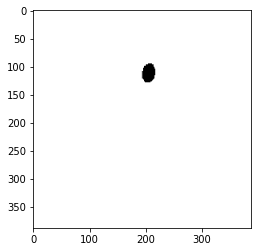

In [10]:
plt.imshow(mask, cmap='Greys')

In [11]:
foreground = np.where(mask > 0, 1, 0)

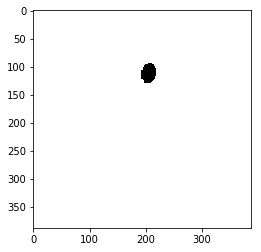

In [12]:
plt.imshow(foreground, cmap='Greys')

In [13]:
foreground[0][0]

0

In [14]:
foreground[100][200]

1

In [15]:
foreground[101][201]

1

In [16]:
background = np.where(mask == 0, 1, 0)

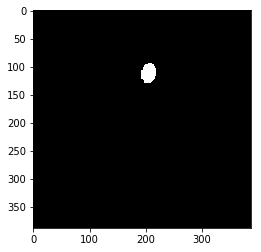

In [17]:
plt.imshow(background, cmap='Greys')

In [18]:
combined = np.stack((foreground, background))

In [19]:
combined.shape

(2, 388, 388)